In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [4]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.linear = torch.nn.Linear(784, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.linear(x)
        ### ========== TODO : END ========== ###
        return outputs

In [16]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.layer1 = torch.nn.Linear(784,400)
        self.layer2 = torch.nn.Linear(400,3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        output_l1 = self.layer1(x)
        sigmoid = torch.sigmoid(output_l1)
        outputs = self.layer2(sigmoid)
        ### ========== TODO : END ========== ###
        return outputs

In [7]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [8]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [9]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [10]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [11]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            outputs = model(batch_X) #forward pass
            optimizer.zero_grad() #initializing gradients to 0
            loss = criterion(outputs, batch_y)#compute loss
            loss.backward() #loss.backward
            optimizer.step()#update model parameters
            ### ========== TODO : END ========== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

In [21]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== TODO : START ========== ###
data_directory_path =  "/content/drive/My Drive/CM146_PSet3"
### ========== TODO : END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== TODO : START ========== ###
### part a: print out three training images with different labels
print("Image label:", y_train[0])
#plot_img(X_train[0])

print("Image label:", y_train[1])
#plot_img(X_train[1])

print("Image label:", y_train[7])
#plot_img(X_train[7])

### ========== TODO : END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== TODO : START ========== ###
### part b: convert numpy arrays to tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_valid_tensor = torch.tensor(X_valid)
y_valid_tensor = torch.tensor(y_valid)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)
### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model1 = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model1.parameters(), lr=0.0005)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0005)
### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model1, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

#one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
#two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

Image label: 1
Image label: 0
Image label: 2
Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 0.702182 | train acc 0.863333 | valid loss 0.716152 | valid acc 0.813333 |
| epoch  2 | train loss 0.485374 | train acc 0.943333 | valid loss 0.505258 | valid acc 0.886667 |
| epoch  3 | train loss 0.368492 | train acc 0.953333 | valid loss 0.393865 | valid acc 0.913333 |
| epoch  4 | train loss 0.296575 | train acc 0.973333 | valid loss 0.322582 | valid acc 0.940000 |
| epoch  5 | train loss 0.249345 | train acc 0.976667 | valid loss 0.275735 | valid acc 0.940000 |
| epoch  6 | train loss 0.216379 | train acc 0.976667 | valid loss 0.244606 | valid acc 0.946667 |
| epoch  7 | train loss 0.191303 | train acc 0.980000 | valid loss 0.219826 | valid acc 0.946667 |
| epoch  8 | train loss 0.171933 | train acc 0.980000 | valid loss 0.201707 | valid acc 0.953333 |
| epoch  9 | train loss 0.155917 | train acc 0.983333 | valid loss 0.186788 | valid acc

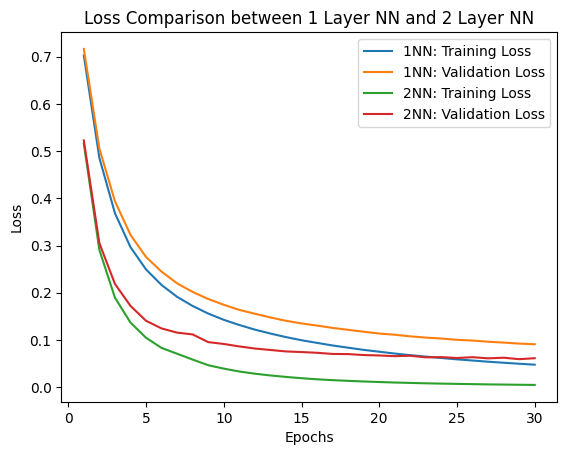

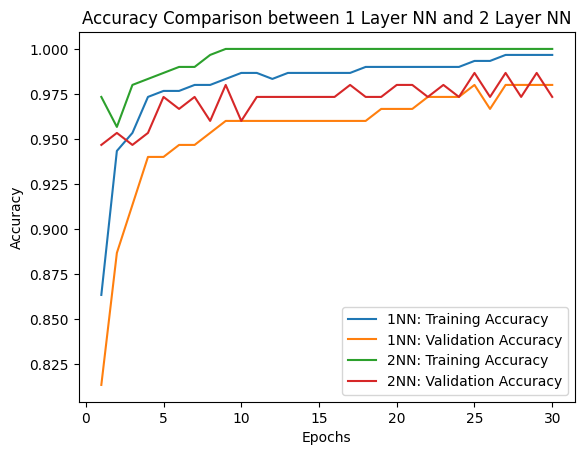

1NN Test Accuracy: tensor(0.9667)
2NN Test Accuracy: tensor(0.9600)


In [22]:

### ========== TODO : START ========== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
epochs = np.arange(1,31)
plt.plot(epochs, results_one[0], label='1NN: Training Loss')
plt.plot(epochs, results_one[1], label="1NN: Validation Loss")
plt.plot(epochs, results_two[0], label='2NN: Training Loss')
plt.plot(epochs, results_two[1], label='2NN: Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Comparison between 1 Layer NN and 2 Layer NN")
plt.show()

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
epochs = np.arange(1,31)
plt.plot(epochs, results_one[2], label='1NN: Training Accuracy')
plt.plot(epochs, results_one[3], label="1NN: Validation Accuracy")
plt.plot(epochs, results_two[2], label='2NN: Training Accuracy')
plt.plot(epochs, results_two[3], label='2NN: Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Comparison between 1 Layer NN and 2 Layer NN")
plt.show()
### ========== TODO : END ========== ##

### ========== TODO : START ========== ###
### part k: calculate the test accuracy
test_one = evaluate_acc(model1, test_loader)
test_two = evaluate_acc(model_two, test_loader)
print("1NN Test Accuracy:", test_one)
print("2NN Test Accuracy:", test_two)


### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== TODO : END ========== ###



